(50000, 28, 28) (50000,)


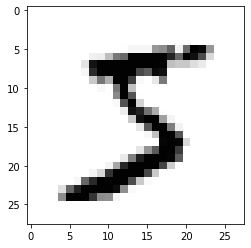

In [6]:
import tensorflow.keras as keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

%matplotlib inline

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    
    # Оставим 10000 примеров на валидацию
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
## Размеры
print(X_train.shape, y_train.shape)
## Нарисуем пример
plt.imshow(X_train[0], cmap="Greys");

In [7]:
## Сделаем объекты плоскими N*28*28 to  N*784

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

## Лейблы нужно сделать One-Hot
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train dimension:
(50000, 784)
Test dimension:
(10000, 784)
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='SGD', 
              metrics=['mean_squared_error'])

history = model.fit(X_train, y_train, epochs=15, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/15
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.0833 - val_mean_squared_error: 0.0833
Epoch 2/15
5000/5000 [==============================] - 5s 983us/step - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 3/15
5000/5000 [==============================] - 5s 963us/step - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.0639 - val_mean_squared_error: 0.0639
Epoch 4/15
5000/5000 [==============================] - 5s 963us/step - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 5/15
5000/5000 [==============================] - 5s 974us/step - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 6/15
5000/5000 [==============================] - 5s 967us/step - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 

# Задание
1. Выбрать верный loss
2. Добавить accuracy как оценку качества
3. Исследовать изменение качества при
        3.1. Изменении числа слоев
        3.2. Изменении числа нейронов
        3.3. Изменение функции активации
3. Исследовать параметры SGD, сделать выводы

```
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
)
```

In [9]:
import tensorflow as tf 
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## 1. Loss
Выберем Кросс энтропию

## 2. И добавим accuracy
Как оценку качества

In [11]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=10,
                    verbose=0, validation_data=(X_test, y_test))

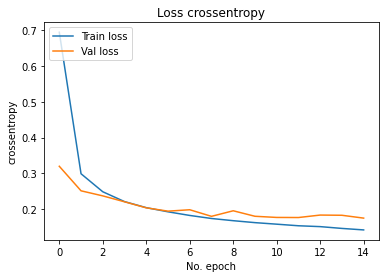

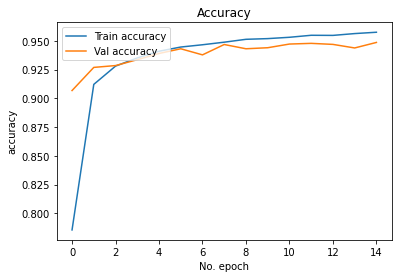

In [12]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Loss crossentropy')
plt.ylabel('crossentropy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

## 3. Параметры сети
### 3.1 Число слоёв

In [20]:
historys = {}
for n_lay in range(1, 13):
    model = Sequential()
    model.add(Dense(25, input_dim=X_train.shape[1], activation='relu'))
    for _i in range(n_lay):
        model.add(Dense(25 - _i, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=6, batch_size=10,
                        verbose=0, validation_data=(X_test, y_test))
    historys[n_lay+2] = history

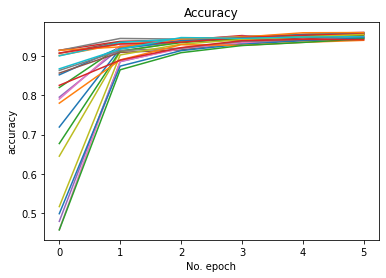

In [21]:
for n_l in historys:
    plt.plot(historys[n_l].history['accuracy'], label=f'Train, {n_l} layers')
    plt.plot(historys[n_l].history['val_accuracy'], label=f'Val, {n_l} layers')
    
plt.xlabel('No. epoch')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.show()

Эпох хватило

In [22]:
n_ls = [ l for l in historys]
val_acc_nl = []
train_acc_nl = []
for nn in n_ls:
    val_acc_nl.append(historys[nn].history['val_accuracy'][-1])
    train_acc_nl.append(historys[nn].history['accuracy'][-1])

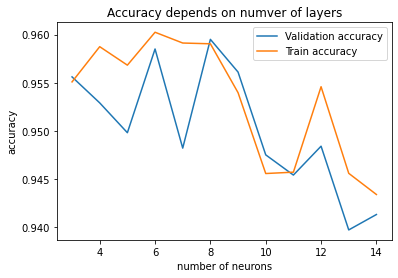

In [23]:
plt.plot(n_ls, val_acc_nl, label='Validation accuracy')
plt.plot(n_ls, train_acc_nl, label='Train accuracy')
plt.legend()
plt.title('Accuracy depends on numver of layers')
plt.xlabel('number of neurons')
plt.ylabel('accuracy')
plt.show()

Ну, это шум, судя по всему можно экономить на числе слоёв. Пусть будет 6 слоёв

А теперь построим чтото подобное но для

### 3.2 число нейронов

In [28]:
import numpy as np

In [86]:
historys_nn = {}
for n_neu in np.linspace(20, 400, 30,dtype=int):
    
    print(f'{n_neu}')
    model = Sequential()
    model.add(Dense(n_neu, input_dim=X_train.shape[1], activation='relu'))
    nnn_s = np.linspace(15, n_neu, 4, dtype=int)
    for _i in range(4):
        model.add(Dense(nnn_s[-1 * _i -1], input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=20, batch_size=10,
                        validation_data=(X_test, y_test))
    historys_nn[n_neu] = history
    
    print(f'{n_neu}', end='\r')

20
Epoch 1/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.8169 - accuracy: 0.7297 - val_loss: 0.3036 - val_accuracy: 0.9143
Epoch 2/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2821 - accuracy: 0.9189 - val_loss: 0.2649 - val_accuracy: 0.9210
Epoch 3/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2245 - accuracy: 0.9344 - val_loss: 0.2283 - val_accuracy: 0.9337
Epoch 4/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1969 - accuracy: 0.9431 - val_loss: 0.1938 - val_accuracy: 0.9451
Epoch 5/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1796 - accuracy: 0.9478 - val_loss: 0.2260 - val_accuracy: 0.9340
Epoch 6/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1657 - accuracy: 0.9521 - val_loss: 0.1770 - val_accuracy: 0.9481
Epoch 7/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1573 - accuracy: 0.9543 - val_loss: 0.1584 - val_accura

5000/5000 [==============================] - 8s 2ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.1062 - val_accuracy: 0.9693
Epoch 9/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.1112 - val_accuracy: 0.9680
Epoch 10/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.1403 - val_accuracy: 0.9623
Epoch 11/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.0968 - val_accuracy: 0.9746
Epoch 12/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.1065 - val_accuracy: 0.9735
Epoch 13/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.1043 - val_accuracy: 0.9728
Epoch 14/20
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.2160 - val_accuracy: 0.950

Epoch 3/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1181 - accuracy: 0.9642 - val_loss: 0.1112 - val_accuracy: 0.9666
Epoch 4/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0899 - accuracy: 0.9729 - val_loss: 0.1052 - val_accuracy: 0.9686
Epoch 5/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0722 - accuracy: 0.9779 - val_loss: 0.1109 - val_accuracy: 0.9653
Epoch 6/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0587 - accuracy: 0.9822 - val_loss: 0.1013 - val_accuracy: 0.9703
Epoch 7/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0927 - val_accuracy: 0.9734
Epoch 8/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.1012 - val_accuracy: 0.9712
Epoch 9/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.1068 - val_accuracy:

Epoch 18/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.1022 - val_accuracy: 0.9776
Epoch 19/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.1027 - val_accuracy: 0.9771
Epoch 20/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.1229 - val_accuracy: 0.9734
164
Epoch 1/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.5285 - accuracy: 0.8371 - val_loss: 0.2148 - val_accuracy: 0.9362
Epoch 2/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1716 - accuracy: 0.9494 - val_loss: 0.1387 - val_accuracy: 0.9578
Epoch 3/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1145 - accuracy: 0.9655 - val_loss: 0.1176 - val_accuracy: 0.9653
Epoch 4/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0849 - accuracy: 0.9750 - val_loss: 0.0988 - val_ac

Epoch 13/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.1000 - val_accuracy: 0.9760
Epoch 14/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0899 - val_accuracy: 0.9794
Epoch 15/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0924 - val_accuracy: 0.9795
Epoch 16/20
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.1182 - val_accuracy: 0.9758
Epoch 17/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0934 - val_accuracy: 0.9812
Epoch 18/20
5000/5000 [==============================] - 7s 1ms/step - loss: 9.0040e-04 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9813
Epoch 19/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.1034 - va

5000/5000 [==============================] - 7s 1ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.0839 - val_accuracy: 0.9738
Epoch 5/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0857 - val_accuracy: 0.9751
Epoch 6/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.0776 - val_accuracy: 0.9757
Epoch 7/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0853 - val_accuracy: 0.9738
Epoch 8/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0923 - val_accuracy: 0.9729
Epoch 9/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0859 - val_accuracy: 0.9756
Epoch 10/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0816 - val_accuracy: 0.9779
Ep

5000/5000 [==============================] - 7s 1ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0939 - val_accuracy: 0.9786
Epoch 14/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0991 - val_accuracy: 0.9770
Epoch 15/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0943 - val_accuracy: 0.9782
Epoch 16/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0941 - val_accuracy: 0.9802
Epoch 17/20
5000/5000 [==============================] - 7s 1ms/step - loss: 4.8662e-04 - accuracy: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9811
Epoch 18/20
5000/5000 [==============================] - 7s 1ms/step - loss: 2.9618e-04 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9810
Epoch 19/20
5000/5000 [==============================] - 7s 1ms/step - loss: 2.3235e-04 - accuracy: 1.0000 - val_loss: 0.0972 - val_ac

5000/5000 [==============================] - 7s 1ms/step - loss: 0.0997 - accuracy: 0.9696 - val_loss: 0.0929 - val_accuracy: 0.9697
Epoch 4/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0700 - accuracy: 0.9786 - val_loss: 0.0771 - val_accuracy: 0.9752
Epoch 5/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0507 - accuracy: 0.9849 - val_loss: 0.0805 - val_accuracy: 0.9751
Epoch 6/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.0804 - val_accuracy: 0.9774
Epoch 7/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0801 - val_accuracy: 0.9772
Epoch 8/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0882 - val_accuracy: 0.9770
Epoch 9/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0935 - val_accuracy: 0.9760
Epo

In [87]:
nn_s = [ k for k in historys_nn]
val_acc_nn = []
train_acc_nn = []
for nn in nn_s:
    val_acc_nn.append(historys_nn[nn].history['val_accuracy'][-1])
    train_acc_nn.append(historys_nn[nn].history['accuracy'][-1])

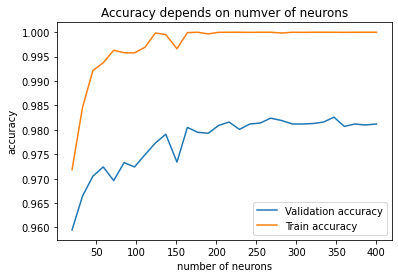

In [88]:
plt.plot(nn_s, val_acc_nn, label='Validation accuracy')
plt.plot(nn_s, train_acc_nn, label='Train accuracy')
plt.legend()
plt.title('Accuracy depends on numver of neurons')
plt.xlabel('number of neurons')
plt.ylabel('accuracy')
plt.show()

250 нейронов, 6 слоя

### 3.3 Функция активации

In [33]:
act_funcs = ['sigmoid', 'relu', 'softplus', 'softsign', 'tanh', ]
history_act = {}

In [34]:
for act in act_funcs:
    model = Sequential()
    model.add(Dense(250,input_dim=X_train.shape[1], activation=act))
    nnn_s = np.linspace(15, 250, 4, dtype=int)
    for _i in range(4):
        model.add(Dense(nnn_s[-1 * _i -1], input_dim=X_train.shape[1], activation=act))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='SGD', 
                  metrics=['accuracy'])
    history_act[act] = model.fit(X_train, y_train, epochs=10, batch_size=10,
                                 validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 2.3038 - accuracy: 0.1109 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 2.3020 - accuracy: 0.1108 - val_loss: 2.3013 - val_accuracy: 0.1010
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 2.3020 - accuracy: 0.1115 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 2.3015 - accuracy: 0.1128 - val_loss: 2.3003 - val_accuracy: 0.1135
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 2.3011 - accuracy: 0.1129 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 6/10
5000/5000 [==============================] - 8s 2ms/step - loss: 2.3008 - accuracy: 0.1134 - val_loss: 2.3000 - val_accuracy: 0.1135
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 2.3002 - accuracy: 0.1141 - val_loss: 2.2994 - val_accuracy:

5000/5000 [==============================] - 7s 1ms/step - loss: 0.0373 - accuracy: 0.9895 - val_loss: 0.0806 - val_accuracy: 0.9755


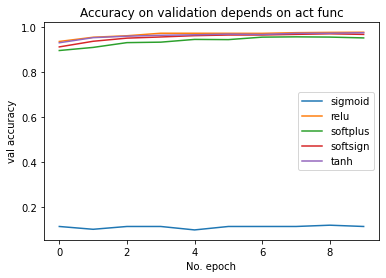

In [37]:
for act in history_act:
    plt.plot(history_act[act].history['val_accuracy'], label=f'{act}')
    
plt.xlabel('No. epoch')
plt.ylabel('val accuracy')
plt.title('Accuracy on validation depends on act func')
plt.legend()
plt.show()

Ахаха сигмоида не оч

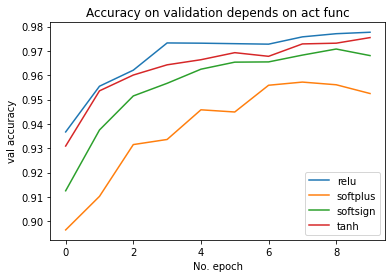

In [38]:
for act in history_act:
    if act != 'sigmoid':
        plt.plot(history_act[act].history['val_accuracy'], label=f'{act}')
    
plt.xlabel('No. epoch')
plt.ylabel('val accuracy')
plt.title('Accuracy on validation depends on act func')
plt.legend()
plt.show()

Ну получается `Relu`

## 4 SGD
### 4.1 Learning rate

In [45]:
lrs = np.logspace(np.log(1e-4)/np.log(10), np.log(0.05)/np.log(10), 7)
history_lr = {}
for lr in lrs:
    model = Sequential()
    model.add(Dense(250,input_dim=X_train.shape[1], activation=act))
    nnn_s = np.linspace(15, 250, 4, dtype=int)
    for _i in range(4):
        model.add(Dense(nnn_s[-1 * _i -1], input_dim=X_train.shape[1], activation=act))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    opt = keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])
    
    history_lr[lr] = model.fit(X_train, y_train, epochs=20, batch_size=10,
                               verbose=0, validation_data=(X_test, y_test))

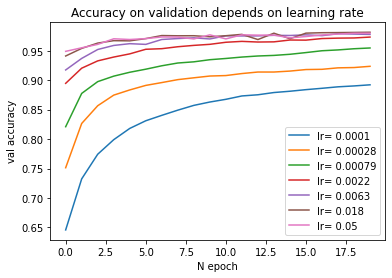

In [59]:
for lr in lrs:
    plt.plot(history_lr[lr].history['val_accuracy'], label=f'lr={lr: .2}')
    
plt.xlabel('N epoch')
plt.ylabel('val accuracy')
plt.title('Accuracy on validation depends on learning rate')
plt.legend()
plt.show()

In [56]:
lr_s = [ k for k in history_lr]
val_acc_lr = []
train_acc_lr = []
for lr in lr_s:
    val_acc_lr.append(history_lr[lr].history['val_accuracy'][-1])
    train_acc_lr.append(history_lr[lr].history['accuracy'][-1])

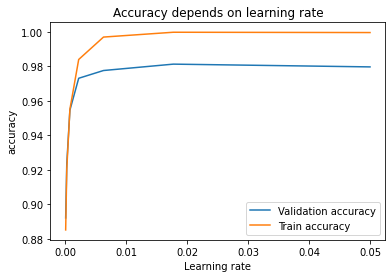

In [60]:
plt.plot(lr_s, val_acc_lr, label='Validation accuracy')
plt.plot(lr_s, train_acc_lr, label='Train accuracy')
plt.legend()
plt.title('Accuracy depends on learning rate')
plt.xlabel('Learning rate')
plt.ylabel('accuracy')
plt.show()

Плато обнаружено


### 4.2 Momentum

In [61]:
moms = np.logspace(np.log(1e-5)/np.log(10), np.log(0.05)/np.log(10), 8)
history_mom = {}
for mom in moms:
    model = Sequential()
    model.add(Dense(250,input_dim=X_train.shape[1], activation=act))
    nnn_s = np.linspace(15, 250, 4, dtype=int)
    for _i in range(4):
        model.add(Dense(nnn_s[-1 * _i -1], input_dim=X_train.shape[1], activation=act))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    opt = keras.optimizers.SGD(learning_rate=0.01, momentum=mom)
    model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])
    
    history_mom[mom] = model.fit(X_train, y_train, epochs=20, batch_size=10,
                               verbose=0, validation_data=(X_test, y_test))

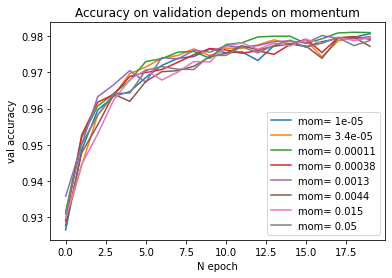

In [70]:
for mom in moms:
    plt.plot(history_mom[mom].history['val_accuracy'], label=f'mom={mom: .2}')
    
plt.xlabel('N epoch')
plt.ylabel('val accuracy')
plt.title('Accuracy on validation depends on momentum')
plt.legend()
plt.show()

Много шума, всё работает наверно +- одинаково

In [68]:
mom_s = [ k for k in moms]
val_acc_mom = []
train_acc_mom = []
for mom in mom_s:
    val_acc_mom.append(history_mom[mom].history['val_accuracy'][-1])
    train_acc_mom.append(history_mom[mom].history['accuracy'][-1])

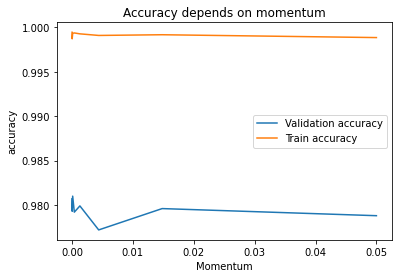

In [69]:
plt.plot(mom_s, val_acc_mom, label='Validation accuracy')
plt.plot(mom_s, train_acc_mom, label='Train accuracy')
plt.legend()
plt.title('Accuracy depends on momentum')
plt.xlabel('Momentum')
plt.ylabel('accuracy')
plt.show()

Какбудто 0.015 оптимально

### 4.3 Nesterov

In [71]:
ness = [True, False]
history_nes = {}
for nes in ness:
    model = Sequential()
    model.add(Dense(250,input_dim=X_train.shape[1], activation=act))
    nnn_s = np.linspace(15, 250, 4, dtype=int)
    for _i in range(4):
        model.add(Dense(nnn_s[-1 * _i -1], input_dim=X_train.shape[1], activation=act))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    opt = keras.optimizers.SGD(learning_rate=0.015, momentum=mom, nesterov=nes)
    model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])
    
    history_nes[nes] = model.fit(X_train, y_train, epochs=20, batch_size=10,
                               verbose=0, validation_data=(X_test, y_test))

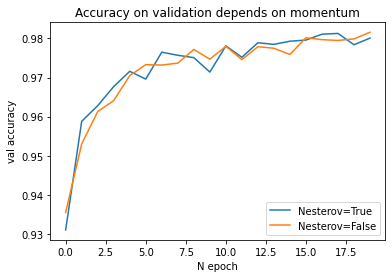

In [75]:
for nes in ness:
    plt.plot(history_nes[nes].history['val_accuracy'], label=f'Nesterov={nes}')
    
plt.xlabel('N epoch')
plt.ylabel('val accuracy')
plt.title('Accuracy on validation depends on momentum')
plt.legend()
plt.show()

Всё едино